In [55]:
import torch 
import torchvision 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as func
import torchvision.transforms as transform
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import cv2
%matplotlib inline 

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu") #, google colab is cutting off my gpu usage. 
#device = torch.device('cpu')

In [57]:
# hyper-parameters
num_epochs = 30
batch_size = 50
learning_rate = 0.01
classes = ['airplane', 'automobile',	'bird', 'cat', 'deer'	,'dog', 'frog', 'horse', 'ship','truck'] # https://www.cs.toronto.edu/~kriz/cifar.html

In [58]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [59]:
train_data = datasets.CIFAR10('./', download=True, train=True, transform=transform)
test_data = datasets.CIFAR10('./', download=True, train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False , num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [60]:
checkdata = iter(train_loader)
img, label = next(checkdata)

automobile
frog
bird
deer


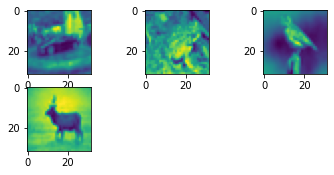

In [61]:
for i in range(1,5):
  print(classes[label[i].item()])
  plt.subplot(3, 3, i)
  plt.imshow(img[i][0])
plt.show()

In [62]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 150)
    self.fc2 = nn.Linear(150, 75)
    self.fc3 = nn.Linear(75, 10)

  def forward(self, x):
    model = self.pool(func.relu(self.conv1(x))) 
    model = self.pool(func.relu(self.conv2(model)))
    model = model.view(-1, 16*5*5)
    model = func.relu(self.fc1(model))
    model = func.relu(self.fc2(model))
    model = self.fc3(model)
    return model

In [63]:
model = Model().to(device)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [65]:
len(train_data)

50000

In [66]:
total_steps = len(train_loader)

for epoch in range(1, num_epochs + 1):
  for steps, (images, labels) in enumerate(train_loader, start = 1):
    images = images.to(device)
    labels = labels.to(device)

    # forward pass 
    predictions = model(images)
    loss = criterion(predictions, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 100 == 0: 
      print("Epochs {}/{}, Steps: {}/{}, Loss: {:.4f}".format(epoch, num_epochs, steps, len(train_loader), loss))


Epochs 1/30, Steps: 100/1000, Loss: 2.3059
Epochs 1/30, Steps: 200/1000, Loss: 2.3000
Epochs 1/30, Steps: 300/1000, Loss: 2.2991
Epochs 1/30, Steps: 400/1000, Loss: 2.2842
Epochs 1/30, Steps: 500/1000, Loss: 2.2810
Epochs 1/30, Steps: 600/1000, Loss: 2.2426
Epochs 1/30, Steps: 700/1000, Loss: 2.2724
Epochs 1/30, Steps: 800/1000, Loss: 2.1890
Epochs 1/30, Steps: 900/1000, Loss: 2.1732
Epochs 1/30, Steps: 1000/1000, Loss: 2.1396
Epochs 2/30, Steps: 100/1000, Loss: 2.1389
Epochs 2/30, Steps: 200/1000, Loss: 2.1581
Epochs 2/30, Steps: 300/1000, Loss: 2.2192
Epochs 2/30, Steps: 400/1000, Loss: 2.0765
Epochs 2/30, Steps: 500/1000, Loss: 2.0099
Epochs 2/30, Steps: 600/1000, Loss: 1.9384
Epochs 2/30, Steps: 700/1000, Loss: 1.8516
Epochs 2/30, Steps: 800/1000, Loss: 2.0432
Epochs 2/30, Steps: 900/1000, Loss: 2.0033
Epochs 2/30, Steps: 1000/1000, Loss: 1.9435
Epochs 3/30, Steps: 100/1000, Loss: 1.8408
Epochs 3/30, Steps: 200/1000, Loss: 1.8055
Epochs 3/30, Steps: 300/1000, Loss: 1.8901
Epochs 3/

In [67]:

correct = 0
with torch.no_grad():
  for (images, labels) in test_loader: # batch training loop 
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images) 

      _, test_predicted = torch.max(outputs.data,1)

      correct += torch.eq(labels, test_predicted).sum()


accuracy = (correct/len(test_data)).item() * 100 
print("Model has {:.2f} % accuracy".format(accuracy))

Model has 63.81 % accuracy


In [68]:
torch.save(model, './my_mnist_model.pt') 